In [1]:
# Importing important libraties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore un-essential warnings
import warnings
warnings.filterwarnings("ignore")

# Formating styles
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")
plt.style.use('ggplot')

# For clear plots
%config InlineBackend.figure_format = 'retina'

## Loading Data

In [2]:
df = pd.read_csv('priv_mcare_f_pay.csv')

In [3]:
df.head()

,msa,year,site,group,priv_count,priv_pay_mean,priv_pay_median,priv_pay_iqr,mcare_los,mcare_pay_mean,mcare_pay_median,mcare_pay_sd,CBSA_NAME,State,FIPS State Code,lon,lat
0,10180,2018,Inpatient,breast reconstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Abilene, TX",Texas,48,-99.733144,32.448736
1,10420,2018,Inpatient,breast reconstruction,8.0,19937.08375,16147.330,5692.86,2.000000,8313.8475,8298.49,1575.325296,"Akron, OH",Ohio,39,-81.519005,41.081445
2,10500,2018,Inpatient,breast reconstruction,NaN,NaN,NaN,NaN,2.000000,9155.9400,9155.94,NaN,"Albany, GA",Georgia,13,-84.155741,31.578507
3,10540,2018,Inpatient,breast reconstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Albany-Lebanon, OR",Oregon,41,-122.907034,44.536512
4,10580,2018,Inpatient,breast reconstruction,4.0,14837.26000,10420.675,4474.06,2.888889,9230.5000,8003.40,6267.381132,"Albany-Schenectady-Troy, NY",New York,36,-73.653621,42.763648


In [4]:
df = df.rename(columns={"FIPS State Code": "FIPS_State_Code"})

## Understanding the data

In [5]:
df.shape

(133089, 17)

In [6]:
df.dtypes

msa                   int64
year                  int64
site                 object
group                object
priv_count          float64
priv_pay_mean       float64
priv_pay_median     float64
priv_pay_iqr        float64
mcare_los           float64
mcare_pay_mean      float64
mcare_pay_median    float64
mcare_pay_sd        float64
CBSA_NAME            object
State                object
FIPS_State_Code       int64
lon                 float64
lat                 float64
dtype: object

In [7]:
# Checking unique values of each object type columns

for col in ['site', 'group', 'CBSA_NAME', 'State']:
    print(f'''
    Column: {col}
    Type: {df[col].dtypes}
    
    Unique Values:
    {df[col].unique()}
    
    ---
    ''')


    Column: site
    Type: object
    
    Unique Values:
    ['Inpatient' 'Outpatient' 'ASC']
    
    ---
    

    Column: group
    Type: object
    
    Unique Values:
    ['breast reconstruction' 'mastectomy' 'navigation' 'ant_cerv_fusion'
 'ant_tls_fusion' 'post_cerv_fusion' 'post_tls_fusion' 'rtc_slap_bank'
 'partial shoulder arthroplasty' 'tsa' 'clavicle fixation'
 'proximal humerus' 'radius/ulna internal fixation' 'tha' 'revision_tha'
 'hip_fracture_fixation' 'tka' 'revision_tka' 'femoral shaft fixation'
 'prox_tibia_fixation' 'ankle_fix' 'bunionectomy' 'pnn' 'fess'
 'septoplasty' 'bsp' 'thoracic' 'lung ablation' 'laac' 'tavr' 'bariatric'
 'colorect' 'lap appendectomy' 'hepat' 'liver ablation' 'hernia'
 'kidney ablation' 'hysterect' 'intracranial_thromb' 'bdet'
 'cardiac ablation' 'cardiac ablation_additional_discrete'
 'cardiac ablation_linear_focal' 'cardiac_ablaton_ice'
 'cardiac_ablaton_anesthesia' 'tpa' 'orthovisc_monovisc'
 'robotic_assisted_surgery' 'pka' 'prostatecto

In [8]:
df.columns

Index(['msa', 'year', 'site', 'group', 'priv_count', 'priv_pay_mean',
       'priv_pay_median', 'priv_pay_iqr', 'mcare_los', 'mcare_pay_mean',
       'mcare_pay_median', 'mcare_pay_sd', 'CBSA_NAME', 'State',
       'FIPS_State_Code', 'lon', 'lat'],
      dtype='object')

In [11]:
num_features = ['priv_count', 'priv_pay_mean', 'priv_pay_median', 'priv_pay_iqr', 'mcare_pay_mean', 
                'mcare_pay_median', 'mcare_pay_sd', 'lon', 'lat', 'mcare_los']

In [12]:
df.describe()

,msa,year,priv_count,priv_pay_mean,priv_pay_median,priv_pay_iqr,mcare_los,mcare_pay_mean,mcare_pay_median,mcare_pay_sd,FIPS_State_Code,lon,lat
count,133089.000000,133089.0000,66202.000000,54334.000000,54334.000000,5.433400e+04,67570.000000,74050.000000,74050.000000,66124.000000,133089.000000,132762.000000,132762.000000
mean,29849.788698,2019.0000,13.978535,28157.253920,26076.224624,9.902053e+03,1.930654,10873.248776,10395.598520,4535.481798,27.859951,-92.190325,37.817306
std,11423.888454,0.8165,55.079214,30496.418573,28716.343199,1.874054e+04,2.733494,8613.394358,8086.426254,6282.442145,16.747575,16.193456,5.797395
min,10180.000000,2018.0000,0.000000,-40877.890000,-40877.890000,-3.640000e-12,0.000000,0.000000,0.000000,0.000000,1.000000,-157.858333,18.080708
25%,19804.000000,2018.0000,0.000000,11428.353750,10270.022500,0.000000e+00,0.000000,4421.606720,4241.021318,924.460491,13.000000,-98.493067,34.140662
50%,29540.000000,2019.0000,2.000000,20839.994165,19574.552500,4.864392e+03,0.000000,9004.434133,9077.012500,2429.105162,26.000000,-87.491541,38.755920
75%,40140.000000,2020.0000,7.000000,34829.904520,32523.502500,1.220583e+04,3.538462,15186.684690,14376.521250,5977.861346,42.000000,-80.721442,41.763179
max,49740.000000,2020.0000,2715.000000,991349.210000,991349.210000,1.175990e+06,109.000000,216396.150000,216396.150000,200165.517300,72.000000,-66.035249,64.837778


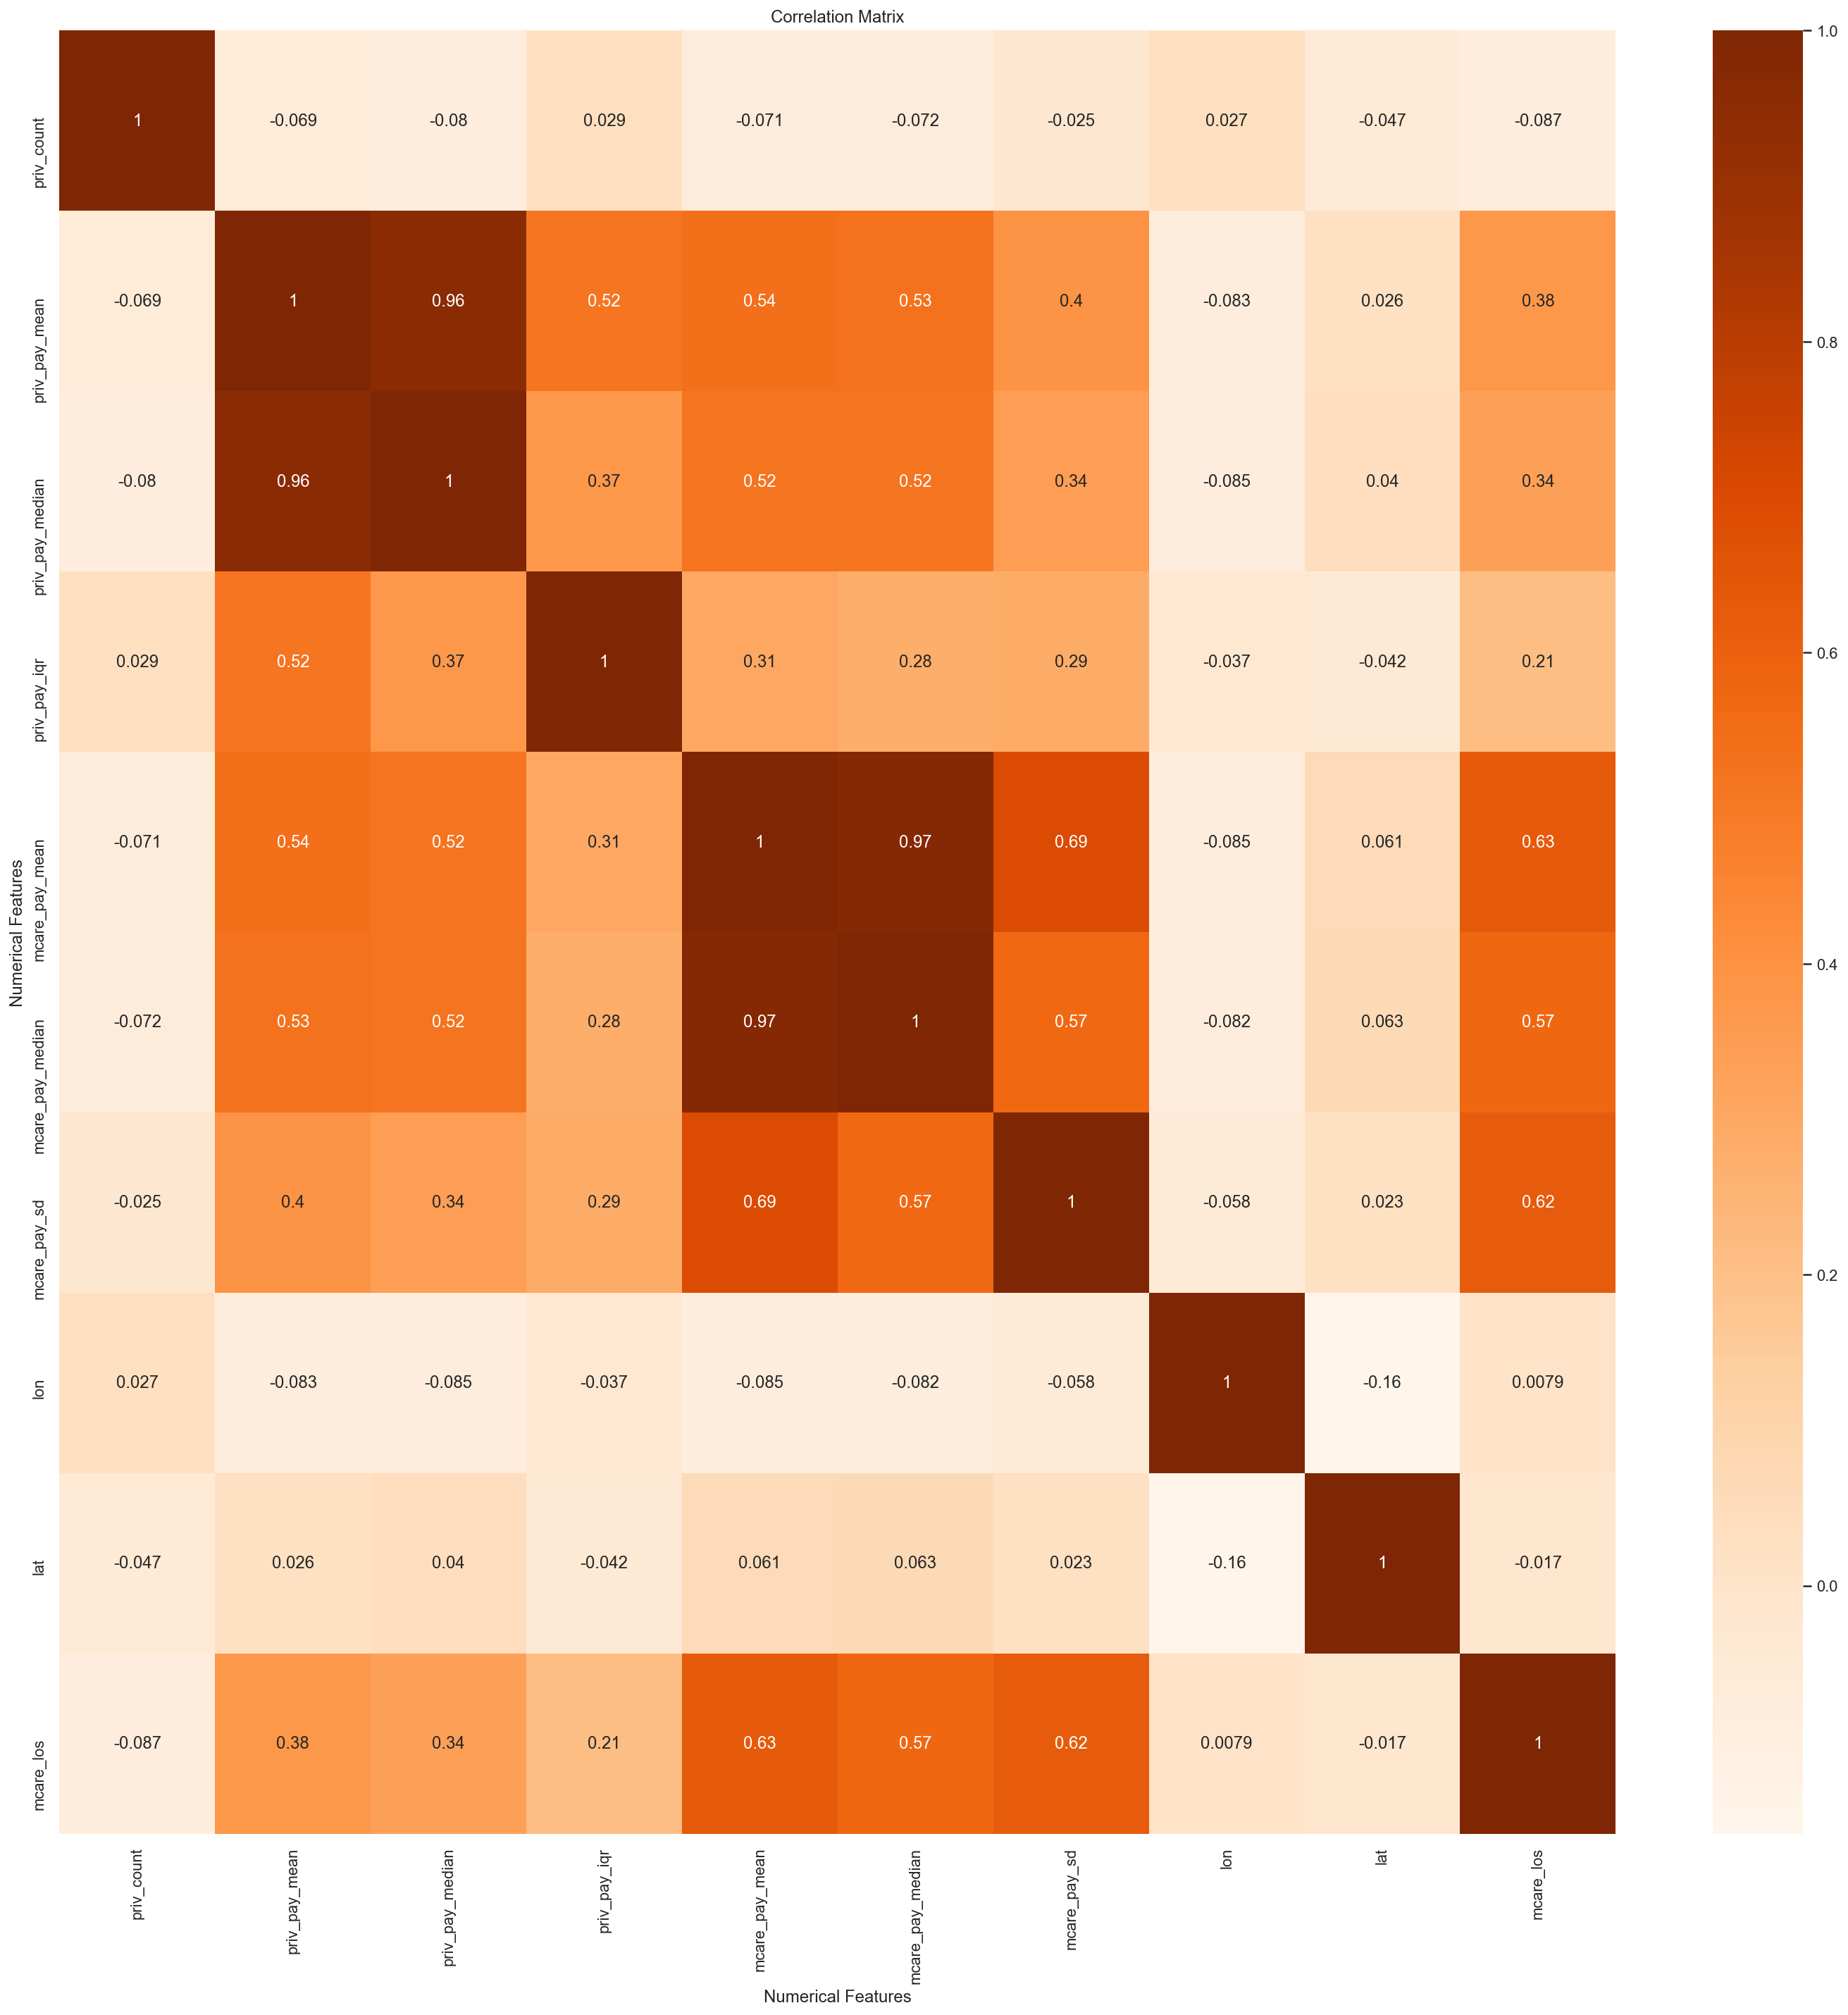

In [13]:
# Plotting correlation matrix

sns.set(rc = {'figure.figsize':(20,20)})
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, cmap="Oranges", annot=True).set(title='Correlation Matrix',
                                         xlabel='Numerical Features',
                                         ylabel='Numerical Features')

plt.tight_layout()

## Missing Values

In [14]:
# Calculating the percentage of missing values for each column

percentages = round(df.isna().sum()*100/df.shape[0], 2)

print('Percentage of Missing Values per column:')
percentages

Percentage of Missing Values per column:


msa                  0.00
year                 0.00
site                 0.00
group                0.00
priv_count          50.26
priv_pay_mean       59.17
priv_pay_median     59.17
priv_pay_iqr        59.17
mcare_los           49.23
mcare_pay_mean      44.36
mcare_pay_median    44.36
mcare_pay_sd        50.32
CBSA_NAME            0.00
State                0.00
FIPS_State_Code      0.00
lon                  0.25
lat                  0.25
dtype: float64

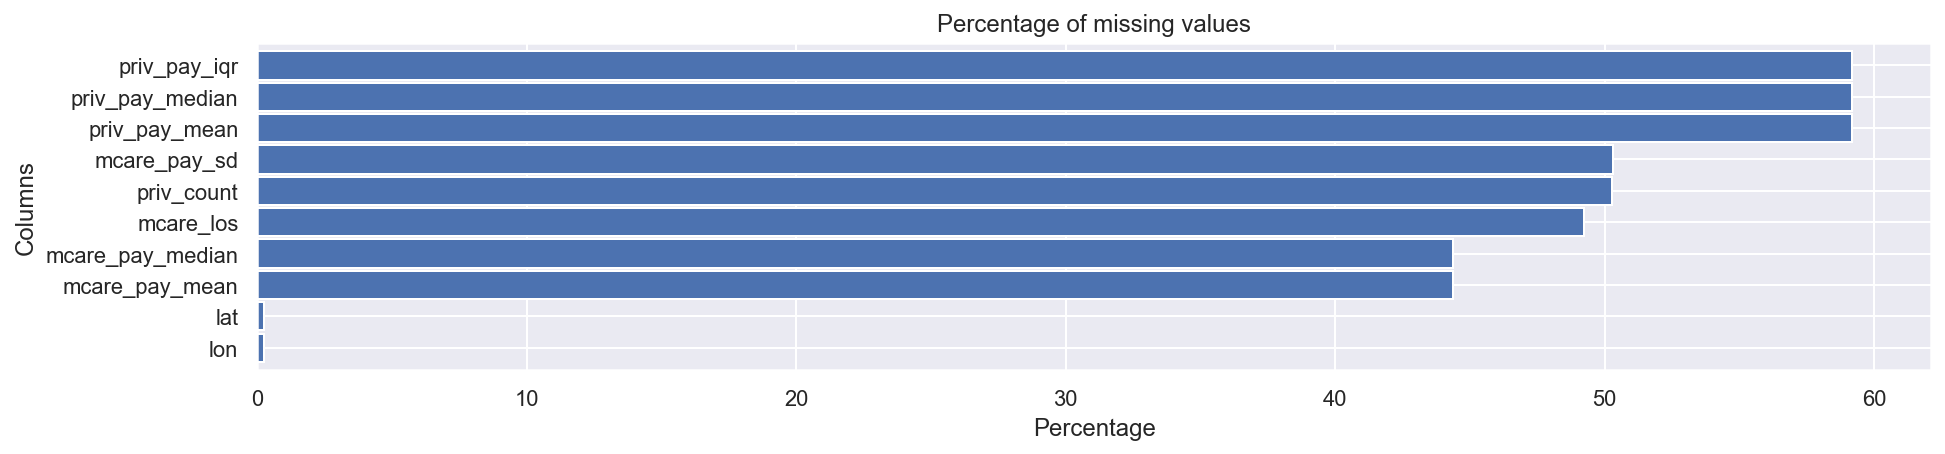

In [15]:
# Plotting the percentage of missing values for each column with missing values

plt.figure(figsize = (15, 3))
percentages[percentages > 0].sort_values().plot.barh(width=0.9)
plt.title('Percentage of missing values')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show();